# Aplicaciones de Python

En esta libreta veremos una aplicación sobre lectura de imágenes satelitales, en este caso de Sentinel-2 (la imagen ha sido descargada de Earth Engine). 

A comparación de usar un software GIS, donde se pueden hacer procesos más intuitivos debido a poseer una interfaz gráfica (o GUI), el usar el lenguaje de programación Python permite aprender un poco más sobre las imágenes. En caso de hacer un proceso repetitivo, el lenguaje Python es una ayuda (aunque requiere documentarse bien sobre los métodos disponibles y más) ya que es de conocimiento su integración con softwares GIS como Arcgis o QGIS.

## 0. Trabajo inicial

Inicialmente veremos qué paquetes se encuentran disponibles (instalados) para su uso y definir la ubicación de la carpeta con los archivos.

In [1]:
# Listado de paquetes instalados en local

%pip list

Note: you may need to restart the kernel to use updated packages.Package                           Version
--------------------------------- -------------------
absl-py                           0.11.0
affine                            2.3.0
aiohttp                           3.7.3
argon2-cffi                       20.1.0
astor                             0.8.1
async-generator                   1.10
async-timeout                     3.0.1
attrs                             20.3.0
backcall                          0.2.0
backports.functools-lru-cache     1.6.1
bleach                            3.3.0
branca                            0.4.2
brotlipy                          0.7.0
cached-property                   1.5.1
cachetools                        4.2.1
certifi                           2020.12.5
cffi                              1.14.4
chardet                           3.0.4
click                             7.1.2
click-plugins                     1.1.1
cligj                           

In [2]:
# Cambio de ruta a carpeta con imagen .tiff

import os 
print('Ruta previa:\n', os.getcwd()) # Antes
os.chdir('E:\Desktop\prueba_imagenes') # cambio a carpeta con imagen .tiff en local
print('Ruta nueva:\n', os.getcwd()) # Después

Ruta previa:
 C:\Users\LENOVO\Documents\00_archivos_python
Ruta nueva:
 E:\Desktop\prueba_imagenes


## 1. Lectura de archivo raster (.tiff)

Para mas información sobre la librería: [Documentación Rasterio](https://rasterio.readthedocs.io/en/latest/)


In [3]:
# Importar librerías

import rasterio 
from rasterio.plot import show

rasterio.__version__

'1.1.8'

In [4]:
# Listado de métodos disponibles en rasterio

for i, value in enumerate(dir(rasterio)):
    print(i, value)

0 Affine
1 Band
2 DatasetReader
3 DriverCapabilityError
4 Env
5 MemoryFile
6 NullHandler
7 Path
8 RasterioIOError
9 __all__
10 __builtins__
11 __cached__
12 __doc__
13 __file__
14 __gdal_version__
15 __loader__
16 __name__
17 __package__
18 __path__
19 __spec__
20 __version__
21 _base
22 _crs
23 _env
24 _err
25 _features
26 _io
27 _shim
28 _transform
29 _warp
30 absolute_import
31 band
32 bool_
33 check_dtype
34 compat
35 complex_
36 contextmanager
37 control
38 coords
39 crs
40 default_gtiff_profile
41 drivers
42 dtypes
43 ensure_env_with_credentials
44 enums
45 env
46 errors
47 float32
48 float64
49 gdal_version
50 get_writer_for_driver
51 get_writer_for_path
52 guard_transform
53 int16
54 int32
55 int8
56 io
57 is_blacklisted
58 log
59 logging
60 namedtuple
61 open
62 pad
63 parse_path
64 path
65 plot
66 profiles
67 rasterio
68 sample
69 sbyte
70 session
71 string_types
72 transform
73 ubyte
74 uint16
75 uint32
76 uint8
77 vrt
78 windows


In [5]:
# Listado de archivos en carpeta
os.listdir() 

['chincha_s2_4_bands.tif']

In [6]:
# Path
image_file = "chincha_s2_4_bands.tif"

# Opening the image
sat_data = rasterio.open(image_file)

# Printing the metadata
from pprint import pprint
print('Metadata:')
pprint(sat_data.meta)

print('Image Information:\n', sat_data)    # Image Information
print('Bands count:\n', sat_data.count)    # bands number
print('Band indexes:\n', sat_data.indexes) # sequence of band indexes R-G-B-Nir (4 bands)
print('Shape:\n', sat_data.shape)          # shape: (height, width) 
print('Bounds:\n', sat_data.bounds)        # limites

Metadata:
{'count': 4,
 'crs': CRS.from_epsg(4326),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 3010,
 'nodata': None,
 'transform': Affine(8.983152841195215e-05, 0.0, -76.21405685151274,
       0.0, -8.983152841195215e-05, -13.32372246253233),
 'width': 2743}
Image Information:
 <open DatasetReader name='chincha_s2_4_bands.tif' mode='r'>
Bands count:
 4
Band indexes:
 (1, 2, 3, 4)
Shape:
 (3010, 2743)
Bounds:
 BoundingBox(left=-76.21405685151274, bottom=-13.594115363052307, right=-75.96764896907875, top=-13.32372246253233)


Una imagen satelital es una imagen digital obtenida mediante el proceso de conversión de la energía electromagnética registrada mediante sensores abordo de un satélite a valores de pixel. Por ello, una imagen digital no es más que una malla de pixeles donde cada pixel tiene un valor el cual representa la información de reflectancia reflejada por ese mismo punto en superficie y captada por el sensor en el espacio.

In [7]:
# Representación de una imagen satelital en forma de tipo array
# Nota: Son 4 bandas -> 4 matrices 2D : 1 matriz 3D
sat_data.read()

array([[[1458, 1468, 1466, ...,  889,  778,  877],
        [1474, 1478, 1478, ...,  876,  778,  839],
        [1506, 1486, 1504, ...,  895,  830,  772],
        ...,
        [ 342,  374,  381, ..., 1104,  913,  797],
        [ 335,  327,  360, ..., 1288, 1290, 1182],
        [ 346,  350,  390, ...,  978, 1144, 1350]],

       [[2034, 2060, 2064, ..., 1234, 1074, 1196],
        [2052, 2054, 2092, ..., 1246, 1130, 1210],
        [2126, 2088, 2088, ..., 1284, 1176, 1208],
        ...,
        [ 598,  583,  627, ..., 1570, 1276, 1106],
        [ 590,  576,  630, ..., 1716, 1742, 1604],
        [ 591,  618,  630, ..., 1328, 1572, 1776]],

       [[2576, 2608, 2580, ..., 1356, 1300, 1440],
        [2586, 2608, 2624, ..., 1416, 1270, 1444],
        [2686, 2622, 2636, ..., 1516, 1338, 1462],
        ...,
        [ 312,  297,  306, ..., 1798, 1474, 1222],
        [ 302,  294,  313, ..., 1998, 1980, 1832],
        [ 294,  314,  293, ..., 1528, 1834, 2100]],

       [[2708, 2724, 2690, ..., 1514,

In [8]:
# Asignar cada banda en un variable por separado (visualización)
b, g, r, nir = sat_data.read()
b, g, r, nir

(array([[1458, 1468, 1466, ...,  889,  778,  877],
        [1474, 1478, 1478, ...,  876,  778,  839],
        [1506, 1486, 1504, ...,  895,  830,  772],
        ...,
        [ 342,  374,  381, ..., 1104,  913,  797],
        [ 335,  327,  360, ..., 1288, 1290, 1182],
        [ 346,  350,  390, ...,  978, 1144, 1350]], dtype=uint16),
 array([[2034, 2060, 2064, ..., 1234, 1074, 1196],
        [2052, 2054, 2092, ..., 1246, 1130, 1210],
        [2126, 2088, 2088, ..., 1284, 1176, 1208],
        ...,
        [ 598,  583,  627, ..., 1570, 1276, 1106],
        [ 590,  576,  630, ..., 1716, 1742, 1604],
        [ 591,  618,  630, ..., 1328, 1572, 1776]], dtype=uint16),
 array([[2576, 2608, 2580, ..., 1356, 1300, 1440],
        [2586, 2608, 2624, ..., 1416, 1270, 1444],
        [2686, 2622, 2636, ..., 1516, 1338, 1462],
        ...,
        [ 312,  297,  306, ..., 1798, 1474, 1222],
        [ 302,  294,  313, ..., 1998, 1980, 1832],
        [ 294,  314,  293, ..., 1528, 1834, 2100]], dtype=uint

In [9]:
# Información de cada banda (dimensiones y valor min-max)
for i in range(sat_data.count):
    print('Banda {a}: height-width {b} y min-max {c}'.format(
      a = i+1, 
      b = sat_data.read(i+1).shape,
      c = (sat_data.read(i+1).min(), sat_data.read(i+1).max())
      )
  )

Banda 1: height-width (3010, 2743) y min-max (1, 7192)
Banda 2: height-width (3010, 2743) y min-max (1, 7260)
Banda 3: height-width (3010, 2743) y min-max (75, 7332)
Banda 4: height-width (3010, 2743) y min-max (1, 7320)


## 2. Visualización de imagen

Se puede visualizar las imágenes mediante dos formas:
- Usando matplotlib.pyplot
- Usando rasterio


### Visualización usando Matplotlib

Posee por defecto la visualización de imágenes (`.png`, `.jpg`, `.gif`, y más) de tipo `uint-8` máximo.

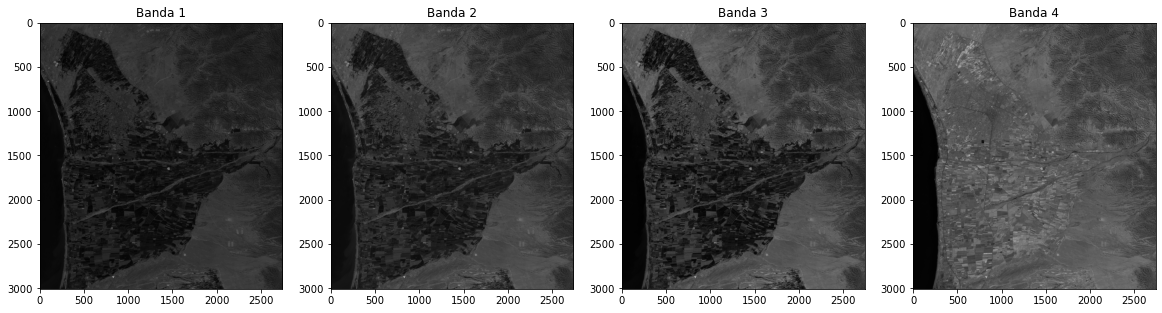

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualización
plt.figure(1,figsize=(20,5))
for i in range(1,4+1):
    # 1: Blue, 2: Green, 3: Red y 4: NIR 
    plt.subplot(1,4,i), plt.imshow(sat_data.read(i), cmap='gray'), plt.title('Banda '+str(i));
    # plt.subplot(122), plt.imshow(r, cmap='gray') # cmap= https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

Normalmente cuando uno hace una visualización con matplotlib.pyplot (comúnmente asignado como `plt`), se producirá un mensaje junto a la visualización. Dicho mensaje es "ocultado" usando el método `plt.show()`. 

Dependiendo de si querer o no que se muestre, yo uso `%matplotlib inline` (usar solo una vez en la libreta) ya que permite usar un `;` al final del código para visualizar y reemplazar la función del `plt.show()`. 

Mayor información (muy recomendado leer): 
- [Python Data Science Handbook by Jake VanderPlas - Visualization with Matplotlib](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.00-Introduction-To-Matplotlib.ipynb)

### Visualización usando Rasterio

Permite la visualización de archivos `geotiff` (aquellos que poseen metadata adjunto con la imagen) de cualquier tipo y a su vez asigna la información de la georeferenciación (de la metadata) a los ejes de cada imagen.

**Visualización básica**

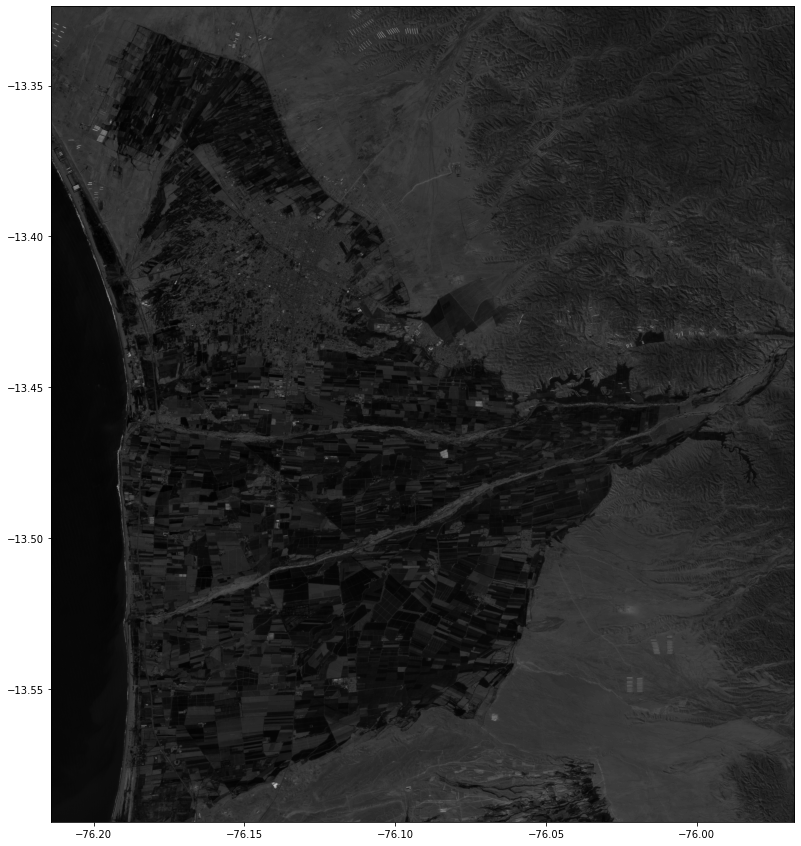

In [11]:
# Visualización básica

# Read and show the image
sen2_arr = sat_data.read()

fig, ax = plt.subplots(figsize=[15,15], ncols=1, nrows=1)
show(sat_data, cmap='gray',ax=ax) # de rasterio.plot
#ax.set_axis_off() # para omitir ejes
plt.show()

**Visualización con ajuste de histograma del 5-95%**

Modificación del histograma:
```
vmin, vmax = np.nanpercentile(sen2_arr, (5,95))  # 5-95% contrast stretch
```
donde se asigna el valor mínimo a `vmin` y el valor máximo a `vmax`, los cuales se usarán como parámetros en el método `show` de rasterio.plot.

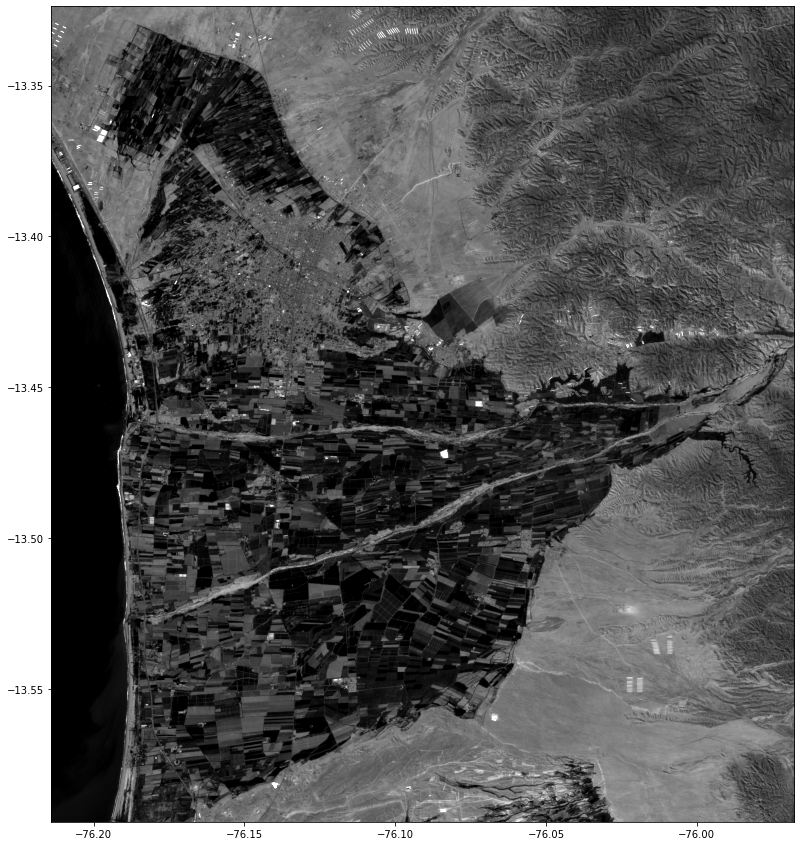

In [13]:
# Visualización con ajuste de histograma

# Lectura de imagen
sen2_arr = sat_data.read()

import numpy as np
vmin, vmax = np.nanpercentile(sen2_arr, (5,95))  # 5-95% contrast stretch

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[15,15]) 
show(sat_data,cmap='gray', vmin=vmin, vmax=vmax, ax=ax); # de rasterio.plot
#ax.set_axis_off() # para omitir los ejes 

Nótese que los ejes se encuentan en coordenadas geográficas ya que rasterio hace uso de la metadata de la imagen.

**Mejor visualización: Color natural**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


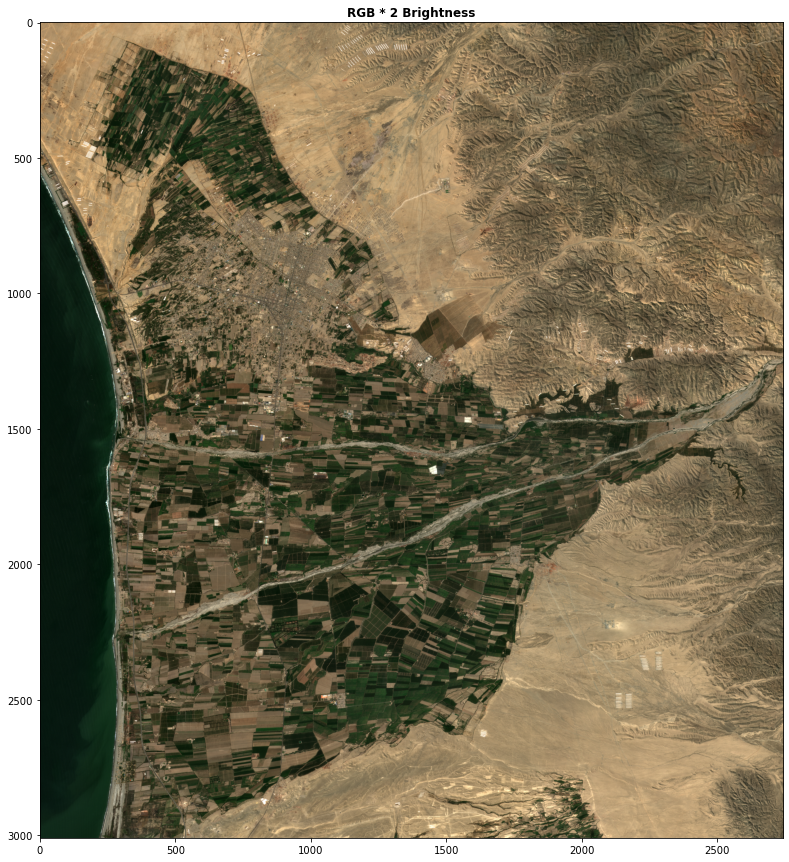

In [14]:
# Mejor visualización - Combinación Red-Green-Blue

from rasterio.plot import show, adjust_band
imgdata = np.array([adjust_band(sat_data.read(i)) for i in (3,2,1)]) # RGB

fig, ax = plt.subplots(1,1,figsize=(15,15)) # o: fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[21,21])
show(imgdata*2, ax=ax, title='RGB * 2 Brightness'); # Factor 2 es usado para incrementar el brillo

# Saldrá una mensaje ya que se normaliza las bandas (valores de 0-1) 

En éste ejemplo se ha hecho:
```
imgdata = np.array([adjust_band(sat_data.read(i)) for i in (3,2,1)])
```
donde se está aplicando el método `adjust_band` de rasterio.plot a cada banda para su normalización haciendo que los ejes muestren información de la cantidad de pixeles en la imagen, perdiéndose la ubicación por coordenadas geográficas.

**Guardar una imagen**

En caso de querer guardar la imagen usar el método `.savefig()` de matplotlib.pyplot. Puede definirse el formato de salida de la imagen.\
Ejemplo:
```
fig.savefig("sen2_op.jpg", bbox_inches='tight')
```

Guardará la imagen en la carpeta de trabajo (definida al inicio).

In [15]:
# Guardar imagen
fig.savefig("sen2_op.jpg", bbox_inches='tight')

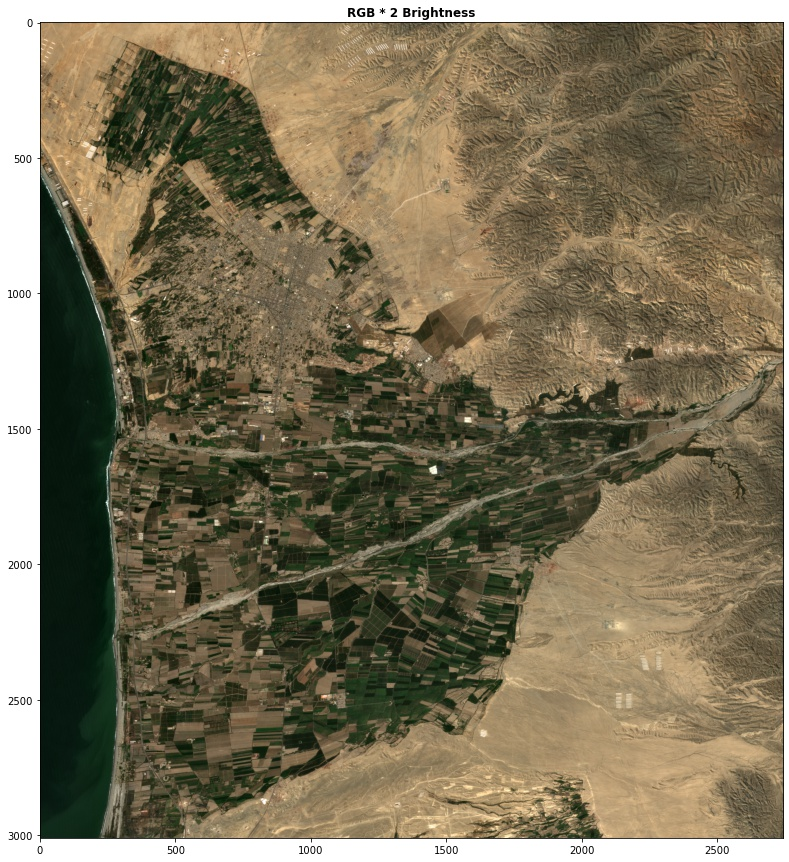

In [16]:
# Ver imagen guardada
from IPython.display import Image
Image('sen2_op.jpg')

**Mejor visualización: Combinación de bandas**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


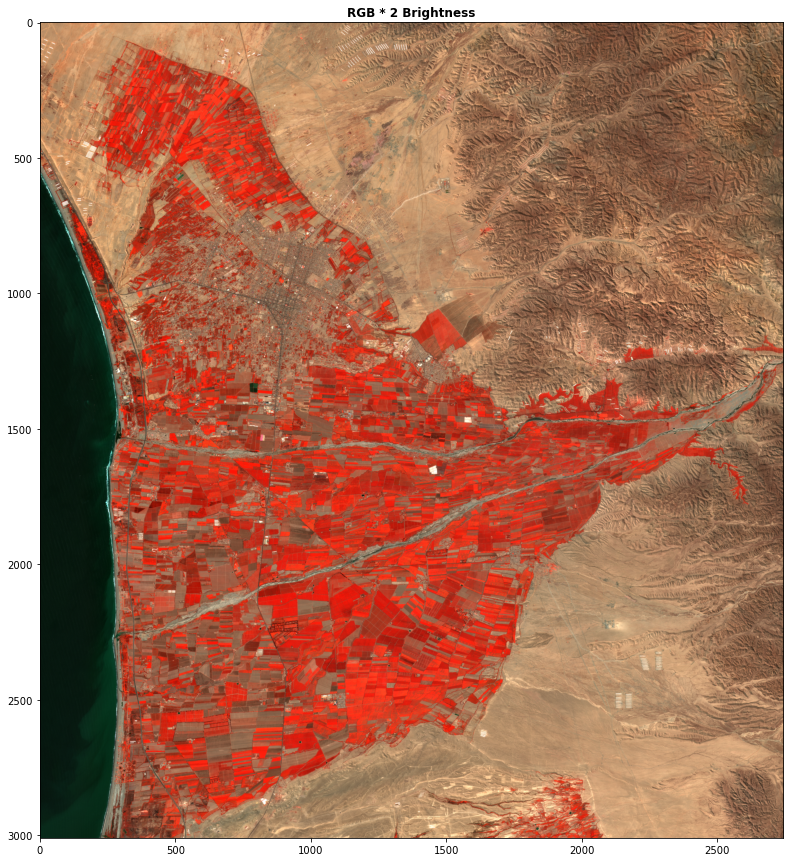

In [17]:
# Mejor visualización - Combinación Nir-Green-Blue

# import numpy as np
# from rasterio.plot import show, adjust_band

imgdata = np.array([adjust_band(sat_data.read(i)) for i in (4,2,1)]) # Nir-Green-Blue según archivo
fig, ax = plt.subplots(1,1,figsize=(15,15)) # fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[21,21])
show(imgdata*2, ax=ax, title='RGB * 2 Brightness');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


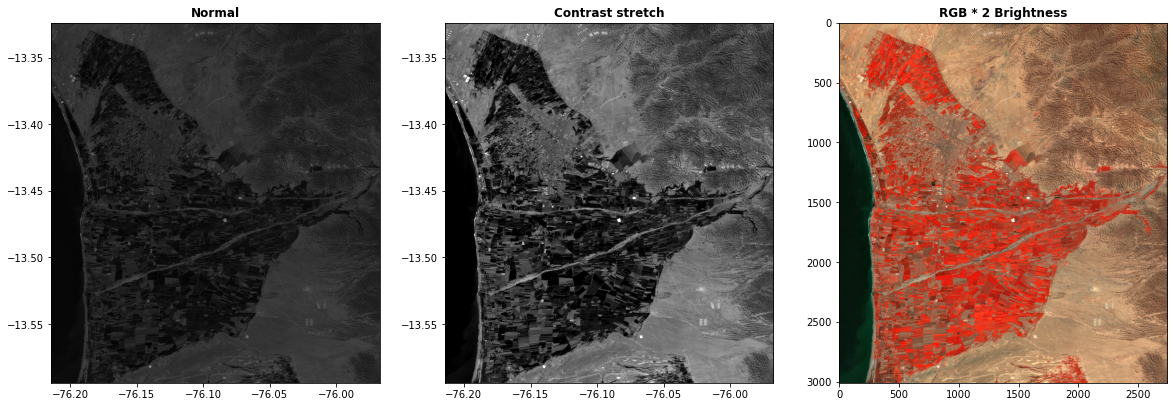

In [18]:
# Ver imágenes juntas

# Read, enhance and show the image
sen2_arr = sat_data.read()
vmin, vmax = np.nanpercentile(sen2_arr, (5,95))  # 5-95% contrast stretch

ig, ax = plt.subplots(figsize=[20,7], ncols=3, nrows=1)
show(sat_data, ax=ax[0], title='Normal', cmap='gray')
show(sat_data, ax=ax[1], title='Contrast stretch', cmap='gray', vmin=vmin, vmax=vmax) 
show(imgdata*2,ax=ax[2], title='RGB * 2 Brightness');

### Visualización de histograma

Mediante el uso de histogramas es posible observar la cantidad de pixeles en cada banda (imagen satelital) o canal (imagen digital).

#### Usando matplotlib

In [19]:
# Usando el método .indexes en un loop 
print(sat_data.indexes)
print(type(sat_data.indexes))

for i in sat_data.indexes:
    print(i)

(1, 2, 3, 4)
<class 'tuple'>
1
2
3
4


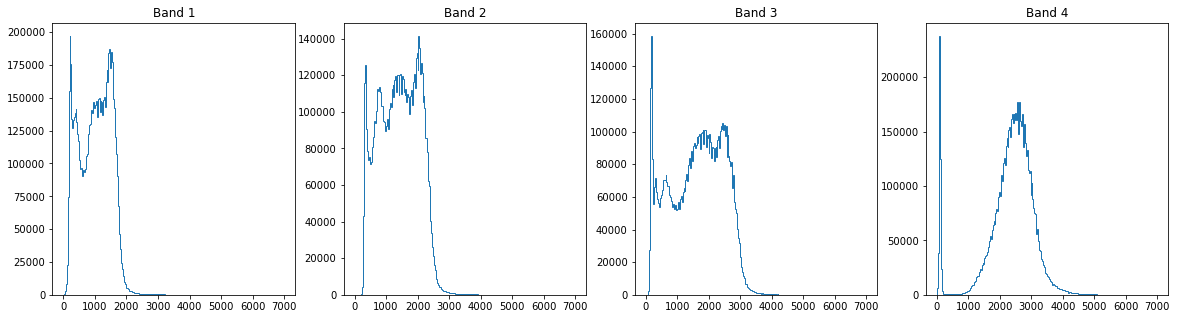

In [20]:
# Visualización de histograma por bandas
plt.figure(1, figsize=(20,5)) 
for i in sat_data.indexes:
    plt.subplot(1,4,i)
    plt.title('Band '+str(i))
    plt.hist(np.ravel(sat_data.read(i)), bins=256, range=(0,7000), histtype='step') # histtype='stepfilled'
    

#### Usando rasterio

El método `show_hist` de Rasterio permite visualizar un histograma general con información de las bandas de la imagen satelital.

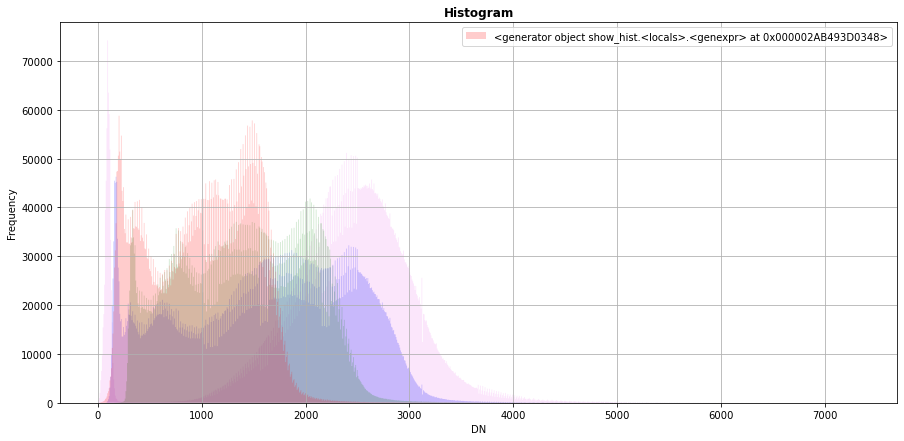

In [21]:
# Histograma

from rasterio.plot import show_hist

plt.figure(1, figsize=(15,7))
show_hist(sat_data, bins=1000, lw=0.0, alpha=0.2, histtype='stepfilled', title='Histogram')